
$$
\begin{aligned}
\frac{r(s)}{\delta(s)}=G_{\delta}^{r}(0) \frac{1+T_{r} s}{1+\frac{2 \zeta s}{\omega_{n}}+\frac{s^{2}}{\omega_{n}^{2}}}
\end{aligned}
$$

$$
G_{\delta}^{r}(0)=\frac{1}{1+A V^{2}} \frac{V}{l} \\
G(0)=\frac{1}{1+A V^{2}} \frac{V}{Nl}
$$

$$
\begin{aligned}
\zeta=\frac{m\left(l_{f}^{2} K_{f}+l_{r}^{2} K_{r}\right)+I\left(K_{f}+K_{r}\right)}{2 l \sqrt{m I K_{f} K_{r}\left(1+A V^{2}\right)}}
\end{aligned}
$$
$$
\begin{aligned}
T_{r}=\frac{m l_{f} V}{2 l K_{r}}
\end{aligned}
$$
$$
\begin{aligned}
\omega_{n} & =\frac{2 l}{V} \sqrt{\frac{K_{f} K_{r}}{m I}} \sqrt{1+A V^{2}}
\end{aligned}
$$

$$
\begin{gathered}
G_{\delta}^{\beta}(0)=\frac{1-\frac{m}{2 l} \frac{l_{f}}{l_{r} K_{r}} V^{2}}{1+A V^{2}} \frac{l_{r}}{l} 
\end{gathered}
$$

$$
\begin{aligned}
K_f = \frac{m_f \cdot a}{2 \cdot \theta_1}
K_r = \frac{m_r \cdot a}{2 \cdot \theta_2}
A = -\frac{1}{l} \left(\frac{\theta_2}{a} - \frac{\theta_1}{a} \right)
\omega_n = \frac{2 l}{V} \sqrt{\frac{K_f K_r}{m I}} \sqrt{1 + A V^{2}}
\end{aligned}
$$



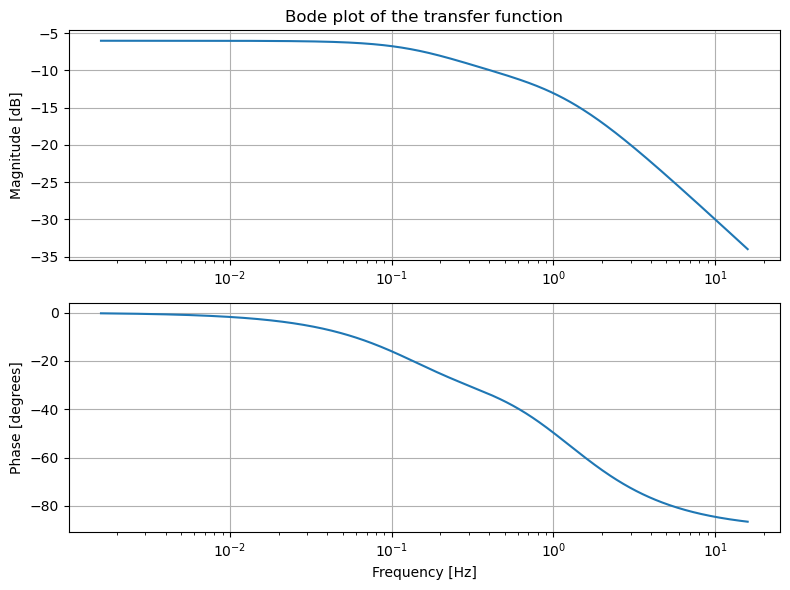

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define parameters
m = 1.0  # Mass
A = 1.0  # Stability factor
V = 1.0  # Velocity
N = 1.0  # Gear ratio
l = 1.0  # Wheelbase
l_f = 1.0  # Front wheel location
l_r = 1.0  # Rear wheel location
K_f = 1.0  # Front spring constant
K_r = 1.0  # Rear spring constant
I = 1.0  # Moment of inertia

# Calculate other parameters
G_dr_0 = 1/(1+A*V**2) * V/(N*l)
zeta = (m*(l_f**2*K_f + l_r**2*K_r) + I*(K_f + K_r))/(2*l*np.sqrt(m*I*K_f*K_r*(1+A*V**2)))
T_r = m*l_f*V/(2*l*K_r)
omega_n = 2*l/V * np.sqrt(K_f*K_r/(m*I)) * np.sqrt(1+A*V**2)

# Define transfer function
num = [G_dr_0*T_r, G_dr_0]
den = [1/omega_n**2, 2*zeta/omega_n, 1]
system = signal.TransferFunction(num, den)

# Frequency range for Bode plot
frequencies = np.logspace(-2, 2, 500)  # Frequency range: 0.01 to 100

# Compute Bode plot
w, mag, phase = signal.bode(system, frequencies)

# Plot Bode diagram
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.semilogx(w/2/np.pi, mag)  # Convert rad/s to Hz for the frequency axis
ax1.set_title('Bode plot of the transfer function')
ax1.set_ylabel('Magnitude [dB]')
ax1.grid(True)

ax2.semilogx(w/2/np.pi, phase)  # Convert rad/s to Hz for the frequency axis
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Phase [degrees]')
ax2.grid(True)

plt.tight_layout()
plt.show()
